In [4]:
# Title: Types of Neural Networks

# Feedforward Neural Networks (FNN)

# 1. Task 1: Single-layer Perceptron
# Task: Build and evaluate a simple single-layer perceptron.
# Exercise: Train it on a linearly separable dataset and analyze results.
# 2. Task 2: Multi-layer Perceptron
# Task: Create a basic multi-layer perceptron for classification.
# Exercise: Implement the perceptron in a coding environment and test with sample data.
# 3. Task 3: XOR Problem
# Task: Solve the XOR logical problem using a feedforward neural network.
# Exercise: Construct a network, train it, and check if it correctly learns the XOR function.

# Convolutional Neural Networks (CNN)

# 1. Example 1: Feature Extraction
# Task: Understand how CNNs extract features from images.
# Exercise: Illustrate feature maps generated by the initial layers of a CNN for a given image.
# 2. Example 2: Image Augmentation
# Task: Explore data augmentation techniques to enhance CNN training.
# Exercise: Apply various transformations to increase training data diversity.
# 3. Example 3: Face Recognition
# Task: Use a CNN to perform basic face recognition tasks.
# Exercise: Provide a dataset of facial images and observe how effectively the CNN distinguishes between different faces.

# Recurrent Neural Networks (RNN)

# 1. Example 1: Sequence Prediction
# Task: Use RNNs for predicting future values in a sequence.
# Exercise: Train an RNN on time series data and attempt to predict the next value.
# 2. Example 2: Text Generation
# Task: Generate text using an RNN trained on literature.
# Exercise: Input a starting sentence and see how the RNN continues it.
# 3. Example 3: Sentiment Analysis
# Task: Implement an RNN for sentiment analysis on movie reviews.
# Exercise: Feed in movie reviews and observe how the RNN classifies them as positive or negative.
    

=== Task 1: Neuron Calculation ===
Neuron output: 0.6637

=== Task 2: Adjusting Weights ===
Output with adjusted weights: 0.6814

=== Task 3: Role of Bias ===
Bias: -0.5, Output: 0.5200
Bias: 0, Output: 0.6411
Bias: 0.5, Output: 0.7465

=== Task 4: Network Structure Visualization ===


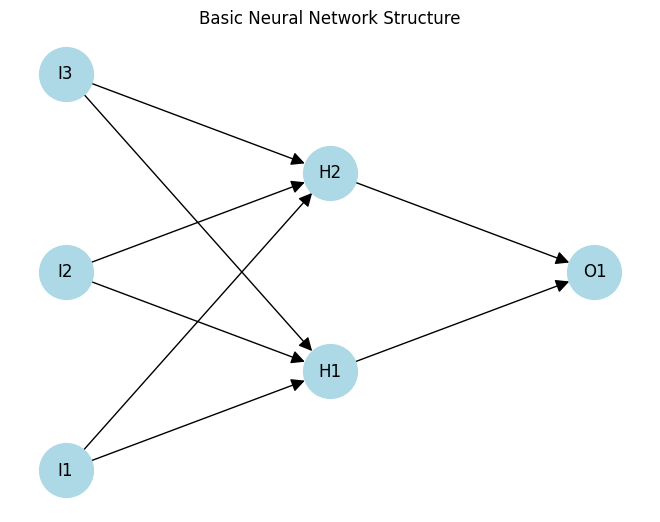


=== Task 5: Information Flow in Network Layers ===

Data flows as follows:
- Input Layer: Receives raw input data.
- Hidden Layers: Perform weighted sums and apply activation functions to extract features.
- Output Layer: Produces final predictions or classifications based on hidden layer outputs.
Each layer transforms data to higher-level representations.


=== Task 6: Number of Layers Impact ===

One hidden layer network:
Output of layer 1: [0.62245933 0.62245933]
Output of layer 2: [0.68932194]

Two hidden layers network:
Output of layer 1: [0.62245933 0.62245933]
Output of layer 2: [0.60723909 0.49693855]
Output of layer 3: [0.67338533]

Increasing layers allows the network to learn more complex patterns but also makes training harder and computationally more expensive.



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# --- Task 1: Neuron Calculation ---
print("=== Task 1: Neuron Calculation ===")

def neuron_output(inputs, weights, bias):
    z = np.dot(inputs, weights) + bias
    # Using sigmoid activation function
    output = 1 / (1 + np.exp(-z))
    return output

inputs = np.array([0.6, -0.4, 0.2])
weights = np.array([0.5, -0.3, 0.8])
bias = 0.1

output = neuron_output(inputs, weights, bias)
print(f"Neuron output: {output:.4f}")

# --- Task 2: Adjusting Weights ---
print("\n=== Task 2: Adjusting Weights ===")

new_weights = np.array([0.9, -0.1, 0.4])
new_output = neuron_output(inputs, new_weights, bias)
print(f"Output with adjusted weights: {new_output:.4f}")

# --- Task 3: Role of Bias ---
print("\n=== Task 3: Role of Bias ===")

for b in [-0.5, 0, 0.5]:
    out = neuron_output(inputs, weights, b)
    print(f"Bias: {b}, Output: {out:.4f}")

# --- Task 4: Network Structure Visualization ---
print("\n=== Task 4: Network Structure Visualization ===")

def draw_network():
    G = nx.DiGraph()

    # Define nodes per layer
    input_nodes = ['I1', 'I2', 'I3']
    hidden_nodes = ['H1', 'H2']
    output_nodes = ['O1']

    # Add nodes
    G.add_nodes_from(input_nodes, layer='Input')
    G.add_nodes_from(hidden_nodes, layer='Hidden')
    G.add_nodes_from(output_nodes, layer='Output')

    # Add edges (fully connected)
    for i in input_nodes:
        for h in hidden_nodes:
            G.add_edge(i, h)
    for h in hidden_nodes:
        for o in output_nodes:
            G.add_edge(h, o)

    # Positions for plotting
    pos = {}
    for i, node in enumerate(input_nodes):
        pos[node] = (0, i)
    for i, node in enumerate(hidden_nodes):
        pos[node] = (1, i + 0.5)
    for i, node in enumerate(output_nodes):
        pos[node] = (2, 1)

    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, arrowsize=20)
    plt.title("Basic Neural Network Structure")
    plt.show()

draw_network()

# --- Task 5: Information Flow in Network Layers ---
print("\n=== Task 5: Information Flow in Network Layers ===")
print("""
Data flows as follows:
- Input Layer: Receives raw input data.
- Hidden Layers: Perform weighted sums and apply activation functions to extract features.
- Output Layer: Produces final predictions or classifications based on hidden layer outputs.
Each layer transforms data to higher-level representations.
""")

# --- Task 6: Number of Layers Impact ---
print("\n=== Task 6: Number of Layers Impact ===")

def simple_feedforward(x, weights_list, biases_list):
    a = x
    for i, (W, b) in enumerate(zip(weights_list, biases_list)):
        z = np.dot(a, W) + b
        a = 1 / (1 + np.exp(-z))  # Sigmoid
        print(f"Output of layer {i+1}: {a}")
    return a

x_input = np.array([1, 0])

# Network with 1 hidden layer
W1 = np.array([[0.4, 0.6], [0.3, 0.1]])  # 2x2
b1 = np.array([0.1, -0.1])
W2 = np.array([[0.7], [0.5]])  # 2x1
b2 = np.array([0.05])

print("\nOne hidden layer network:")
simple_feedforward(x_input, [W1, W2], [b1, b2])

# Network with 2 hidden layers
W1_2 = np.array([[0.4, 0.6], [0.3, 0.1]])
b1_2 = np.array([0.1, -0.1])
W2_2 = np.array([[0.5, -0.4], [0.2, 0.3]])
b2_2 = np.array([0.0, 0.05])
W3_2 = np.array([[0.7], [0.5]])
b3_2 = np.array([0.05])

print("\nTwo hidden layers network:")
simple_feedforward(x_input, [W1_2, W2_2, W3_2], [b1_2, b2_2, b3_2])

print("""
Increasing layers allows the network to learn more complex patterns but also makes training harder and computationally more expensive.
""")


In [6]:
# Title: Basic Structure of a Neural Network

# Neurons, Weights, Biases

# Task 1: Neuron Calculation
# Task: Calculate the output of a single artificial neuron given specific inputs, weights, and bias.
# Exercise: Perform this calculation for a given set of inputs and verify your result.

# Task 2: Adjusting Weights
# Task: Learn how adjusting weights affects the output of a neural network.
# Exercise: Alter the weights and observe the change in the final output.

# Task 3 : Role of Bias
# Task: Understand the impact of bias on a neuron's output.
# Exercise: Add different bias values to a neuron and note the effect on the network's results.


# Input Layer, Hidden Layers, Output Layer

# Task 1: Network Structure Visualization
# Task: Draw the basic structure of a neural network with input, hidden, and output layers.
# Exercise: Label each layer and state its function.

# Task 2: Information Flow in Network Layers
# Task: Follow and describe the flow of data from input to output across layers.
# Exercise: Map out the flow path and indicate any transformations that occur.

# Task 3: Number of Layers Impact
# Task: Explore how the number of layers in a network affects its complexity and performance.
# Exercise: Experiment with networks of different layer counts and compare their performance on a task.

Task 1 - Neuron output: 0.4256
Task 2 - Output with adjusted weights: 0.5793
Task 3 - Effect of different bias values:
  Bias=-0.5: output=0.2891
  Bias=0: output=0.4013
  Bias=0.5: output=0.5250


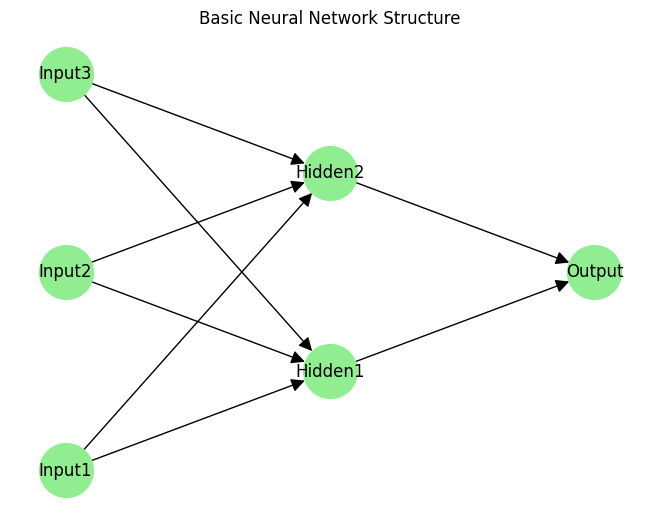


Task 5 - Information Flow:
- Input Layer receives raw input data.
- Hidden Layers process inputs via weights, apply activation functions to detect features.
- Output Layer produces the final output (prediction/classification).
Each layer transforms the data, increasing abstraction and complexity.

Task 6 - One hidden layer network:
Layer 1 output: [0.64565631 0.5621765 ]
Layer 2 output: [0.69654886]
Task 6 - Two hidden layers network:
Layer 1 output: [0.64565631 0.5621765 ]
Layer 2 output: [0.62045528 0.47606151]
Layer 3 output: [0.68037947]

Increasing the number of hidden layers allows the network to learn more complex patterns,
but may increase training time and risk of overfitting.



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# --- Task 1: Neuron Calculation ---
def neuron_output(inputs, weights, bias):
    z = np.dot(inputs, weights) + bias
    return 1 / (1 + np.exp(-z))  # Sigmoid activation

inputs = np.array([0.7, -0.3, 0.5])
weights = np.array([0.2, 0.8, -0.6])
bias = 0.1
output = neuron_output(inputs, weights, bias)
print(f"Task 1 - Neuron output: {output:.4f}")

# --- Task 2: Adjusting Weights ---
new_weights = np.array([0.5, 0.1, -0.2])
new_output = neuron_output(inputs, new_weights, bias)
print(f"Task 2 - Output with adjusted weights: {new_output:.4f}")

# --- Task 3: Role of Bias ---
print("Task 3 - Effect of different bias values:")
for b in [-0.5, 0, 0.5]:
    out = neuron_output(inputs, weights, b)
    print(f"  Bias={b}: output={out:.4f}")

# --- Task 4: Network Structure Visualization ---
def draw_neural_network():
    G = nx.DiGraph()
    input_nodes = ['Input1', 'Input2', 'Input3']
    hidden_nodes = ['Hidden1', 'Hidden2']
    output_nodes = ['Output']

    G.add_nodes_from(input_nodes, layer='input')
    G.add_nodes_from(hidden_nodes, layer='hidden')
    G.add_nodes_from(output_nodes, layer='output')

    for i in input_nodes:
        for h in hidden_nodes:
            G.add_edge(i, h)
    for h in hidden_nodes:
        for o in output_nodes:
            G.add_edge(h, o)

    pos = {}
    for i, node in enumerate(input_nodes):
        pos[node] = (0, i)
    for i, node in enumerate(hidden_nodes):
        pos[node] = (1, i + 0.5)
    for i, node in enumerate(output_nodes):
        pos[node] = (2, 1)

    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, arrowsize=20)
    plt.title("Basic Neural Network Structure")
    plt.show()

draw_neural_network()

# --- Task 5: Information Flow in Network Layers ---
print("""
Task 5 - Information Flow:
- Input Layer receives raw input data.
- Hidden Layers process inputs via weights, apply activation functions to detect features.
- Output Layer produces the final output (prediction/classification).
Each layer transforms the data, increasing abstraction and complexity.
""")

# --- Task 6: Number of Layers Impact ---
def simple_feedforward(x, weights_list, biases_list):
    a = x
    for i, (W, b) in enumerate(zip(weights_list, biases_list)):
        z = np.dot(a, W) + b
        a = 1 / (1 + np.exp(-z))  # Sigmoid activation
        print(f"Layer {i+1} output: {a}")
    return a

x = np.array([1.0, 0.5])

# 1 hidden layer network
W1 = np.array([[0.4, 0.3], [0.2, 0.1]])
b1 = np.array([0.1, -0.1])
W2 = np.array([[0.6], [0.7]])
b2 = np.array([0.05])

print("Task 6 - One hidden layer network:")
simple_feedforward(x, [W1, W2], [b1, b2])

# 2 hidden layers network
W1_2 = np.array([[0.4, 0.3], [0.2, 0.1]])
b1_2 = np.array([0.1, -0.1])
W2_2 = np.array([[0.5, -0.4], [0.3, 0.2]])
b2_2 = np.array([0.0, 0.05])
W3_2 = np.array([[0.6], [0.7]])
b3_2 = np.array([0.05])

print("Task 6 - Two hidden layers network:")
simple_feedforward(x, [W1_2, W2_2, W3_2], [b1_2, b2_2, b3_2])

print("""
Increasing the number of hidden layers allows the network to learn more complex patterns,
but may increase training time and risk of overfitting.
""")
